# Exercise1

This is the first exercise for your computer vision course. After fininshing this exercise you are expected to know:
- How to work with images in OpenCV.
- How to perform image zooming.
- How to enhance the contrast of images through various methods.
- How to apply different operations on pixel values in order to modify images.


# Instructions

- Please provide a proper answer for each part of the questions.
- Use the cells beneath each question for your answer.
- Feel free to add more cells whenever needed.

Good luck!

## Question 1 (15 points)

In computer vision, image zooming is a process that enlarges or reduces an image while preserving or altering its details.

You are provided with an image *einstein.jpg*, and your task is to apply zooming with a factor of 2 using the following two methods: **Pixel replication** and **Zero-order hold**.


**A)** Describe each of the two methods (Pixel replication, Zero-order hold) for image zooming.

**B)** Implement Python code to perform zooming in on the image 'einstein.jpg' using a zoom factor of 2 for each of the two methods. Provide step-by-step explanations of your code for each method.

**C)** For each of the two methods, discuss their advantages and disadvantages. Consider aspects such as image quality, computational complexity, and suitability for different types of images.

**D)** Display the zoomed images for the two methods and report the results. Examine the effects of increasing the zoom factor (e.g., from 2 to 4) on image quality and detail preservation.

**E)** Suggest an improved zooming method and compare its results with the two experimented methods.

You can see the original form of the image below

<img src="einstein.jpg"/>

## pixel replication

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

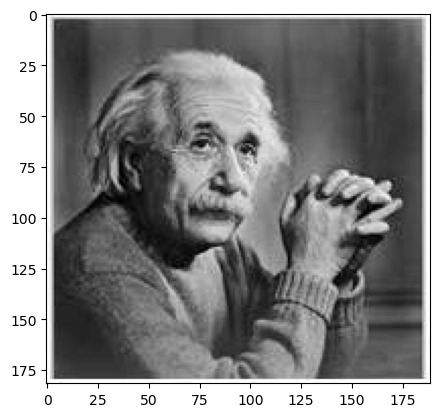

In [19]:
img = cv2.imread('einstein.jpg',cv2.IMREAD_GRAYSCALE)

plt.imshow(img,cmap='gray')


In [36]:
img.shape

(182, 189)

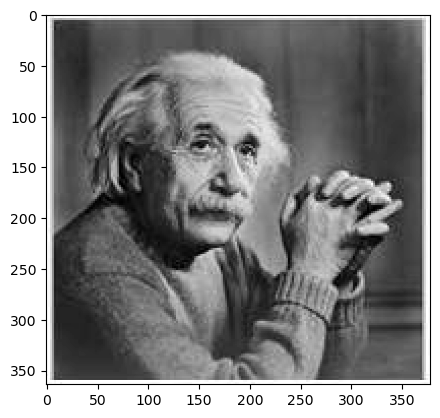

In [ ]:
zoom_factor = 2
for i in range(2):
    img = np.repeat(img, zoom_factor, axis=i) # 0 -> row / 1 -> column
    
plt.imshow(img,cmap='gray')
plt.savefig('./outputs/plot.jpg', format='jpg', bbox_inches="tight")

## Zero-order hold 

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

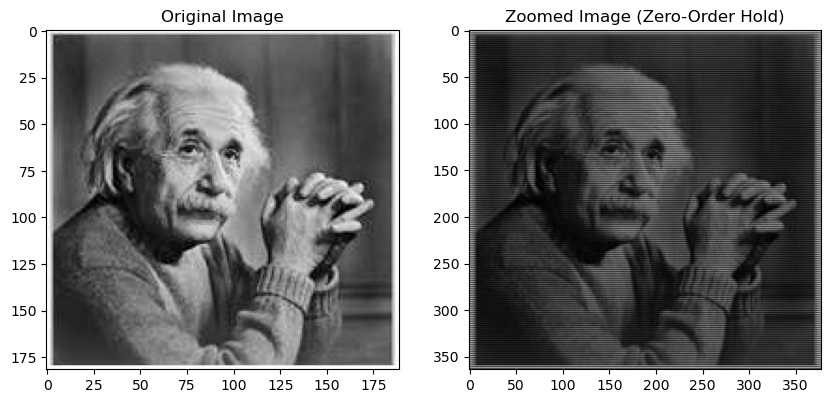

In [ ]:


def zero_order_hold_zoom(image):
    # Get the dimensions of the original image
    original_height, original_width = image.shape[:2]
    
    # Calculate new dimensions for the zoomed image
    new_height = original_height * 2
    new_width = original_width * 2
    
    # Create an empty image with the new dimensions
    zoomed_image = np.zeros((new_height, new_width), dtype=np.uint8)
    
    # Step 1: Row-wise processing
    for i in range(original_height):
        for j in range(original_width):
            # Place the original pixel in the zoomed image
            zoomed_image[2 * i, 2 * j] = image[i, j]  # Original pixel
            
            # Calculate and place the average pixel
            if j < original_width - 1:  # Check if not the last column
                avg_pixel = (int(image[i, j]) + int(image[i, j + 1])) // 2
                zoomed_image[2 * i, 2 * j + 1] = avg_pixel  # Average pixel

    # Step 2: Column-wise processing
    for i in range(new_height):
        for j in range(new_width):
            if i < new_height - 1:  # Check if not the last row
                avg_pixel = (int(zoomed_image[i, j]) + int(zoomed_image[i + 1, j])) // 2
                zoomed_image[i + 1, j] = avg_pixel  # Average pixel

    return zoomed_image

# Load the grayscale image
original_image = cv2.imread('einstein.jpg',cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if original_image is None:
    print("Error: Could not load the image. Please check the path.")
else:
    # Zoom the image using Zero-Order Hold method
    zoomed_image = zero_order_hold_zoom(original_image)

    # Display the original and zoomed images using matplotlib
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(original_image, cmap='gray')  # Display grayscale image
    # plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Zoomed Image (Zero-Order Hold)')
    plt.imshow(zoomed_image, cmap='gray')  # Display grayscale image
    # plt.axis('off')

    plt.show()




## Question 2 (15 points)

You are given a low-contrast grayscale image, 'low_contrast.jpg', which has lost significant details due to insufficient contrast. Your task is to enhance the image using logarithmic and gamma correction techniques. Additionally, you need to plot the histograms of the original and enhanced images for comparison.

<img src="low_contrast.jpg" width="200" height="200"/>

**A)** Normalize the image to ensure its pixel values are within range (0 to 1).

**B)** Describe each of the two methods (Logarithmic correction and Gamma correction) for contrast stretching.

**C)** Apply logarithmic contrast stretching to 'low_contrast.jpg' using the formula:

enhanced_pixel_value = c * log(1 + original_pixel_value)

Choose an appropriate constant 'c' to scale the enhanced pixel values to the range (0 to 1).

**D)** Apply gamma correction to 'low_contrast.jpg'.
Choose a suitable 'gamma' value for enhancing the image's contrast.

**E)** After applying both contrast enhancement techniques, plot histograms for the original and enhanced images on a single figure.

*X-axis:* Pixel intensity values (0 to 1)  
*Y-axis:* Frequency of each intensity value in the image

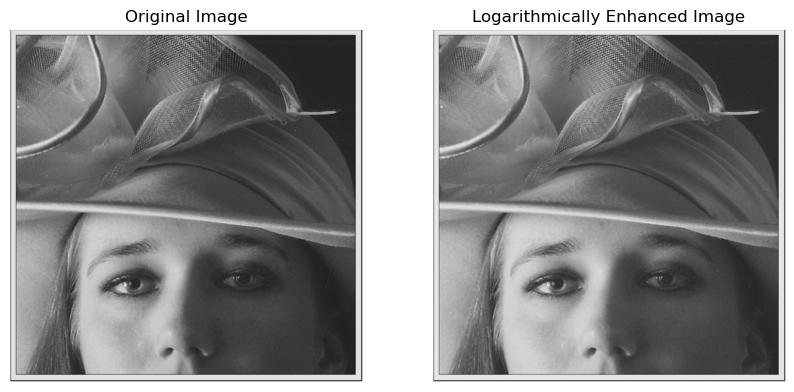

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the low-contrast grayscale image
image_path = 'low_contrast.jpg'  # Replace with your image path
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Normalize the image to range [0, 1]
normalized_image = original_image / 255.0

# Logarithmic contrast stretching
def logarithmic_contrast_stretching(image):
    c = 1 # Choose an appropriate constant
    log_enhanced = c * np.log(1 + image)
    log_enhanced = np.clip(log_enhanced, 0, 1)  # Ensure values are within [0, 1]
    return log_enhanced

log_enhanced_image = logarithmic_contrast_stretching(normalized_image)

# Display the original and logarithmically enhanced images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(normalized_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Logarithmically Enhanced Image')
plt.imshow(log_enhanced_image, cmap='gray')
plt.axis('off')

plt.show()


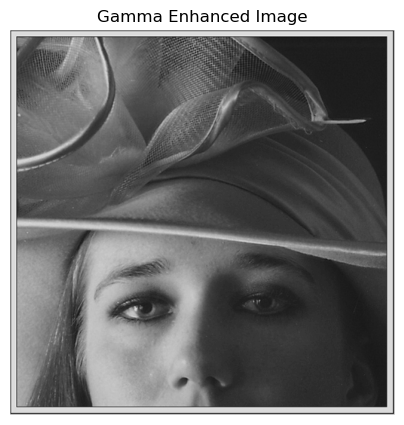

In [43]:
def gamma_correction(image, gamma):
    gamma_corrected = np.power(image, gamma)
    return np.clip(gamma_corrected, 0, 1)  # Ensure values are within [0, 1]

# Choose a suitable gamma value
gamma_value = 1.5 # You can adjust this value
gamma_enhanced_image = gamma_correction(normalized_image, gamma_value)

# Display the gamma corrected image
plt.figure(figsize=(5, 5))
plt.title('Gamma Enhanced Image')
plt.imshow(gamma_enhanced_image, cmap='gray')
plt.axis('off')
plt.show()


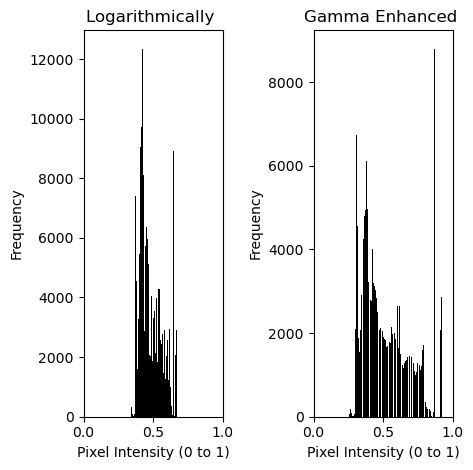

In [44]:
# Histogram for Logarithmically Enhanced Image
plt.subplot(1, 3, 2)
plt.title('Logarithmically ')
plt.hist(log_enhanced_image.ravel(), bins=256, range=[0, 1], color='black')
plt.xlim([0, 1])
plt.xlabel('Pixel Intensity (0 to 1)')
plt.ylabel('Frequency')

# Histogram for Gamma Enhanced Image
plt.subplot(1, 3, 3)
plt.title('Gamma Enhanced ')
plt.hist(gamma_enhanced_image.ravel(), bins=256, range=[0, 1], color='black')
plt.xlim([0, 1])
plt.xlabel('Pixel Intensity (0 to 1)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Question 3 (15 points)

Histogram equalization is a technique widely used in image processing to enhance the contrast of an image by redistributing the intensity values. In this question, you will explore the concept of histogram equalization step by step. Use the image below for this question.

<img src="lena_gray.gif" width="200" height="200"/>

**A)** Normalize the image to ensure its pixel values are within range (0 to 1).

**B)** Calculate and plot the histogram of the original image. Analyze the histogram to understand the distribution of pixel intensities.

**C)** Implement the histogram equalization algorithm on the original image then calculate and plot the histogram of the equalized image.

**D)** Display the original image, the histogram-equalized image, and their respective histograms side by side for comparison.

**E)** Analyze and compare the visual differences between the original and equalized image. Discuss how histogram equalization has affected the distribution of pixel intensities.

In [50]:
import cv2
import imageio
import numpy as np
import matplotlib.pyplot as plt 


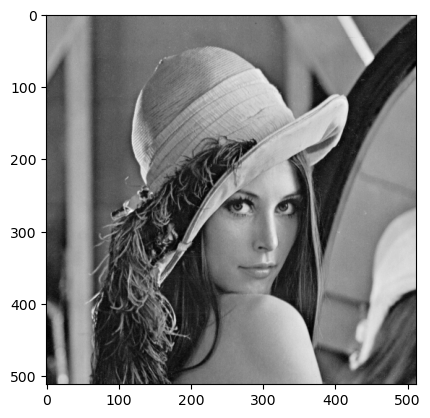

In [51]:
def read_gif(filename):
    gif = imageio.mimread(filename)
    frames = []
    for frame in gif:
        frames.append(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))
    return frames

frames = read_gif('lena_gray.gif')


img = frames[0]

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image,cmap='gray')




## Question 4 (15 points)

The image square.gif contains two square objects. Pixels in the first square have the intensity 
of 150 while those in the second square have the intensity of 220. Read the image and do the following: 

**A)**  The small square is to be translated by 40 pixels in both directions. 

**B)**  The large square is to be rotated by 60 degrees counter clockwise. 

Write the code to perform these transformations. Show the image before and after transformation on the 
same figure.

you can see the original form of the image below:

<img src="square.gif" width="200" height="200"/>

## Question 5 (10 points)

For the image skeleton.gif, try to modify the normalized image using the following functions: 

<img src="functions.png" width="500" height="250"/>

Show the results in each case. Which function produces the best result in your opinion? Discuss your 
results.

You can see the original form of the image below:

<img src="skeleton.gif" width="200" height="200"/>